In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('calendar.csv')
df.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


## EDA

### Understanding the data structure

In [12]:
print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (1969, 14)

Data Types:
date            datetime64[ns]
wm_yr_wk                 int64
weekday                 object
wday                     int64
month                    int64
year                     int64
d                       object
event_name_1            object
event_type_1            object
event_name_2            object
event_type_2            object
snap_CA                  int64
snap_TX                  int64
snap_WI                  int64
dtype: object

Missing Values:
date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64

Basic Statistics:
                      date      wm_yr_wk         wday        month  \
count                 1969   1969.000000  1969.000000  1969.000000   
mean   2013-10-09 00:00:00  11

### Time Series Component Analysis

In [13]:
# Convert date column and set as index for time series analysis
df['date'] = pd.to_datetime(df['date'])
df_time = df.set_index('date')

# Analyze the time range
print(f"Date Range: {df['date'].min()} to {df['date'].max()}")
print(f"Total Days: {(df['date'].max() - df['date'].min()).days}")

# Check for missing dates
date_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')
missing_dates = date_range.difference(df['date'])
print(f"Missing dates: {len(missing_dates)}")

Date Range: 2011-01-29 00:00:00 to 2016-06-19 00:00:00
Total Days: 1968
Missing dates: 0


### Calendar Features Deep Dive

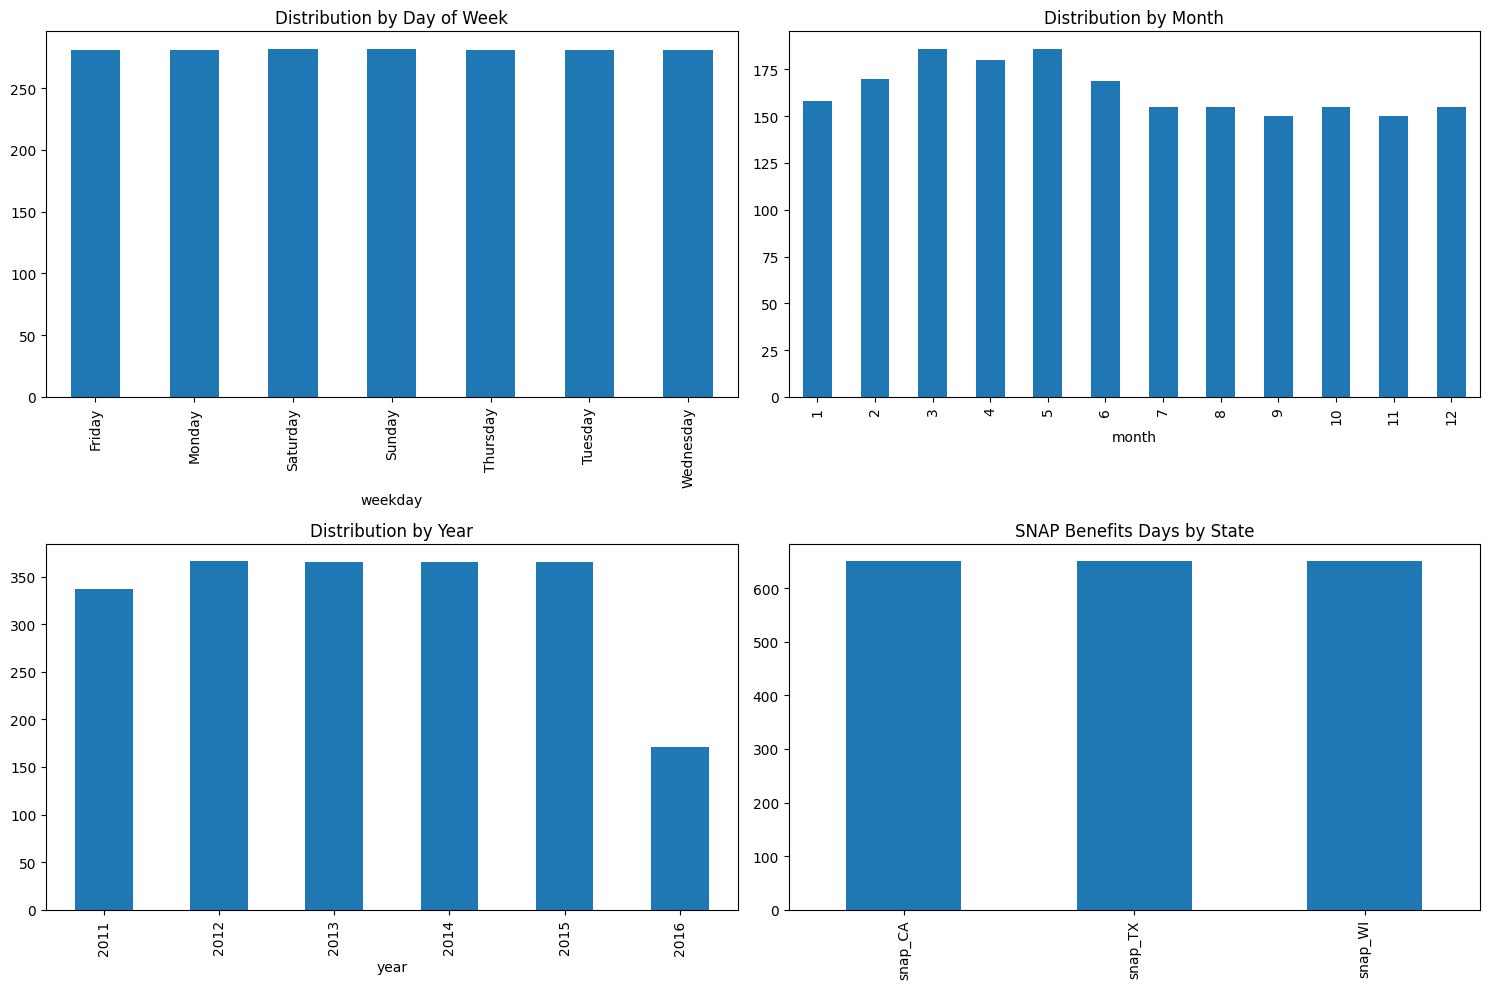

In [ ]:
# Analyze calendar features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Day of week distribution
df['weekday'].value_counts().sort_index().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Distribution by Day of Week')

# Monthly distribution
df['month'].value_counts().sort_index().plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Distribution by Month')

# Yearly distribution
df['year'].value_counts().sort_index().plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Distribution by Year')

# SNAP benefits distribution
snap_cols = ['snap_CA', 'snap_TX', 'snap_WI']
df[snap_cols].sum().plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('SNAP Benefits Days by State')

plt.tight_layout()
plt.show()

### Event Analysis

Total event days: 162
Percentage of days with events: 8.23%

Event Types:
Religious    56
National     52
Cultural     41
Sporting     18
Name: count, dtype: int64


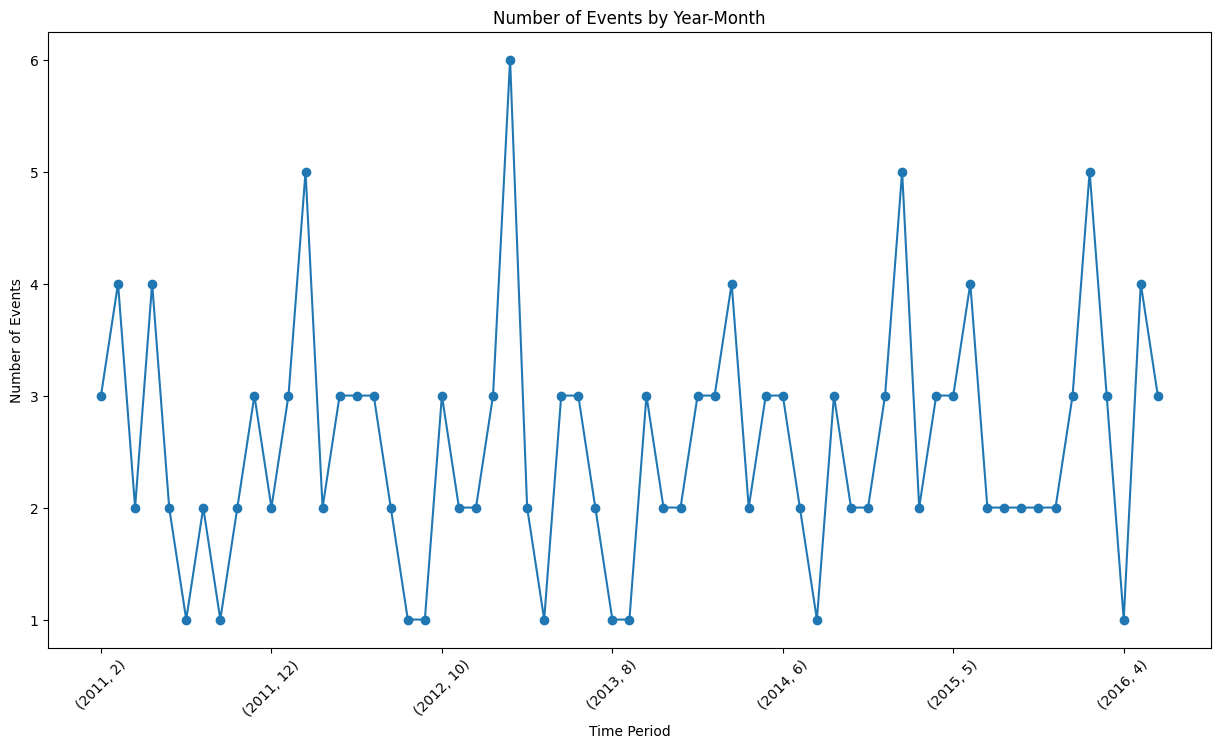

In [10]:
# Analyze events and their impact
events_df = df[df['event_name_1'].notna() | df['event_name_2'].notna()].copy()

print(f"Total event days: {len(events_df)}")
print(f"Percentage of days with events: {len(events_df)/len(df)*100:.2f}%")

# Event type analysis
event_types = []
event_types.extend(df['event_type_1'].dropna().tolist())
event_types.extend(df['event_type_2'].dropna().tolist())

event_type_counts = pd.Series(event_types).value_counts()
print("\nEvent Types:")
print(event_type_counts)

# Visualize events over time
plt.figure(figsize=(15, 8))
events_monthly = events_df.groupby([events_df['year'], events_df['month']]).size()
events_monthly.plot(kind='line', marker='o')
plt.title('Number of Events by Year-Month')
plt.xlabel('Time Period')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.show()

### Seasonality Patterns

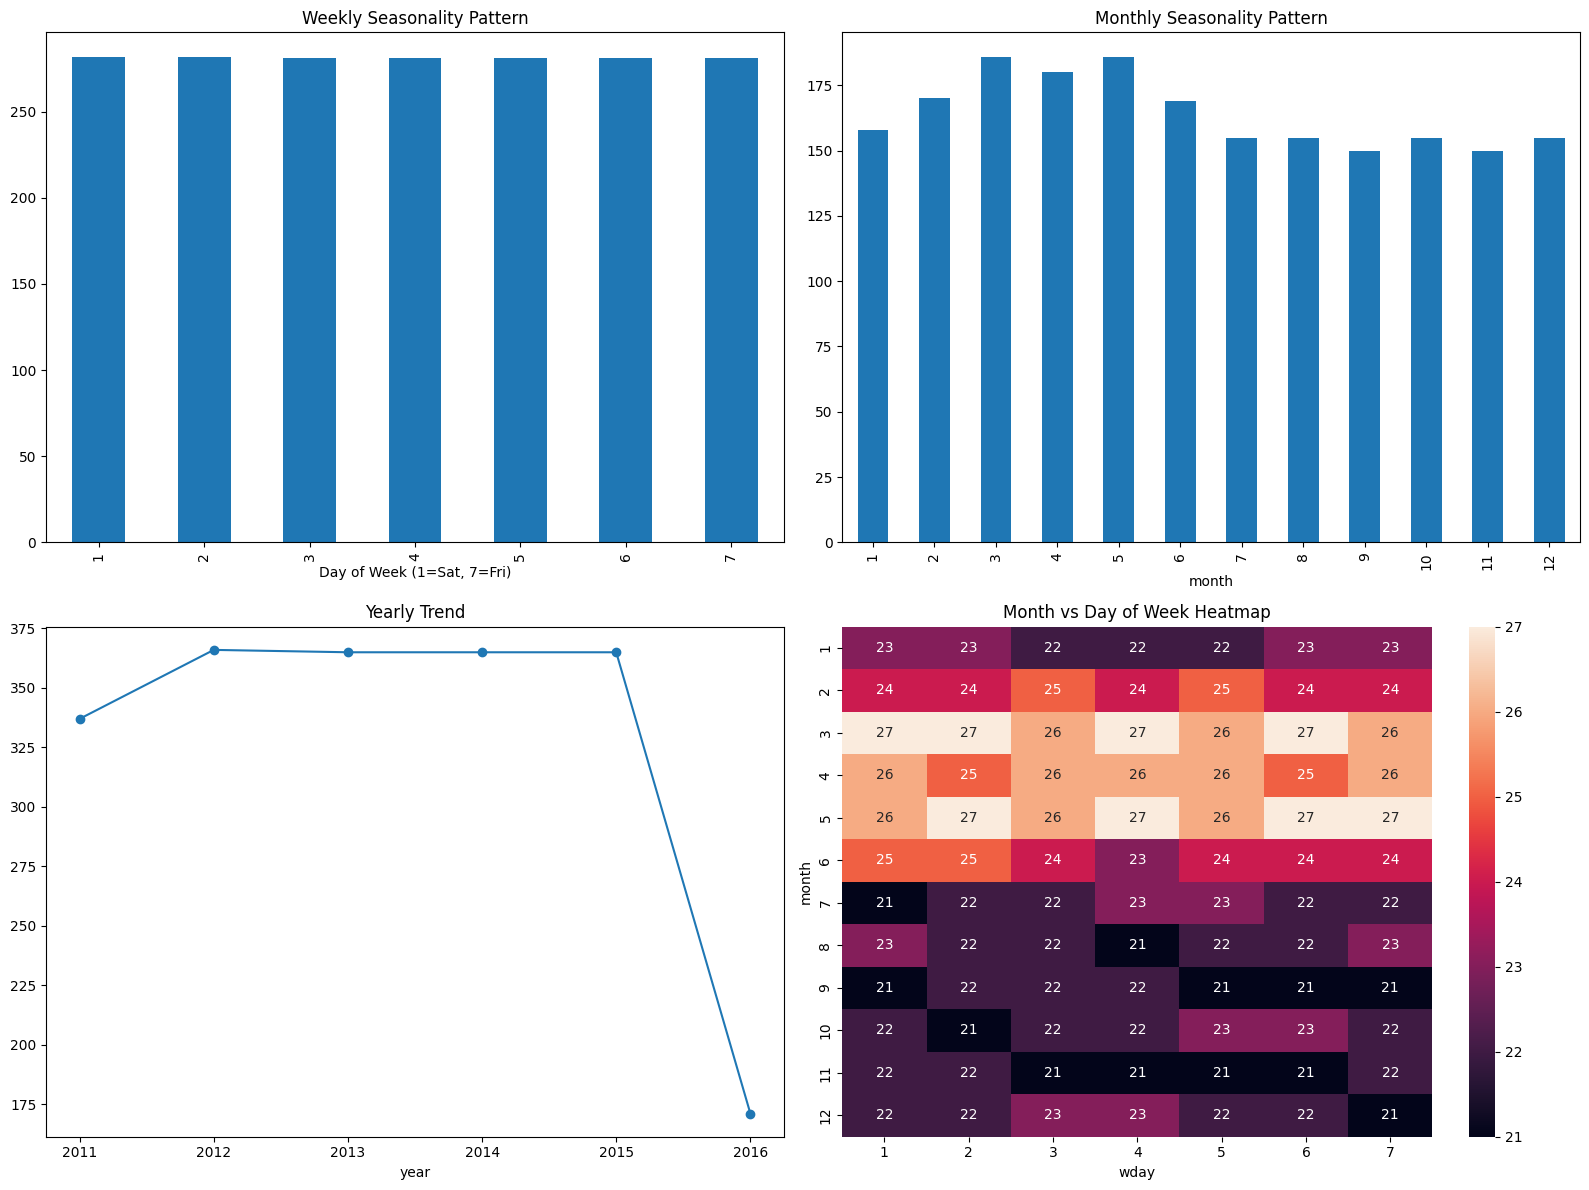

In [11]:
# Create comprehensive seasonality analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Weekly seasonality
weekly_pattern = df.groupby('wday').size()
weekly_pattern.plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Weekly Seasonality Pattern')
axes[0,0].set_xlabel('Day of Week (1=Sat, 7=Fri)')

# Monthly seasonality
monthly_pattern = df.groupby('month').size()
monthly_pattern.plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Monthly Seasonality Pattern')

# Yearly trend
yearly_pattern = df.groupby('year').size()
yearly_pattern.plot(kind='line', marker='o', ax=axes[1,0])
axes[1,0].set_title('Yearly Trend')

# Heatmap of month vs day of week
heatmap_data = df.groupby(['month', 'wday']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, annot=True, fmt='d', ax=axes[1,1])
axes[1,1].set_title('Month vs Day of Week Heatmap')

plt.tight_layout()
plt.show()

### SNAP Benefits Analysis

<Figure size 1200x600 with 0 Axes>

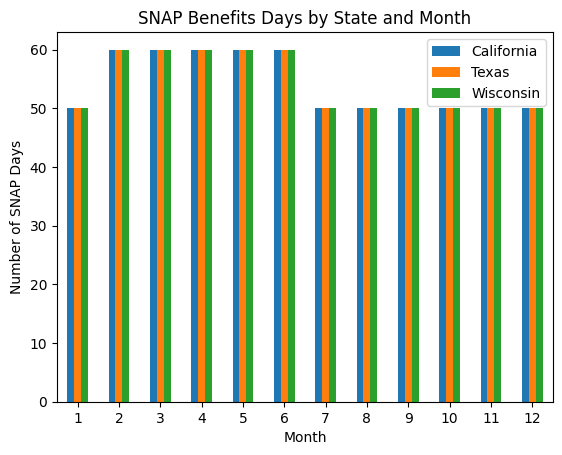

SNAP Benefits by Day of Week:
      snap_CA  snap_TX  snap_WI
wday                           
1          91       92       94
2          94       96       93
3          92       90       92
4          95       94       94
5          93       92       93
6          93       92       93
7          92       94       91


In [14]:
# Analyze SNAP benefits patterns across states
snap_analysis = df[['date', 'month', 'wday', 'snap_CA', 'snap_TX', 'snap_WI']].copy()

# Calculate SNAP benefit days by state and month
snap_monthly = snap_analysis.groupby('month')[['snap_CA', 'snap_TX', 'snap_WI']].sum()

plt.figure(figsize=(12, 6))
snap_monthly.plot(kind='bar')
plt.title('SNAP Benefits Days by State and Month')
plt.xlabel('Month')
plt.ylabel('Number of SNAP Days')
plt.legend(['California', 'Texas', 'Wisconsin'])
plt.xticks(rotation=0)
plt.show()

# Day of week patterns for SNAP
snap_weekly = snap_analysis.groupby('wday')[['snap_CA', 'snap_TX', 'snap_WI']].sum()
print("SNAP Benefits by Day of Week:")
print(snap_weekly)

### Holiday and Event Impact Analysis

In [15]:
# Detailed holiday analysis
major_holidays = ['Christmas', 'Thanksgiving', 'NewYear', 'Independence', 'LaborDay']

holiday_impact = {}
for holiday in major_holidays:
    holiday_days = df[df['event_name_1'].str.contains(holiday, na=False) | 
                     df['event_name_2'].str.contains(holiday, na=False)]
    if len(holiday_days) > 0:
        holiday_impact[holiday] = {
            'count': len(holiday_days),
            'months': holiday_days['month'].unique(),
            'years': holiday_days['year'].unique()
        }

print("Major Holiday Analysis:")
for holiday, info in holiday_impact.items():
    print(f"{holiday}: {info['count']} occurrences across months {info['months']}")

Major Holiday Analysis:
Christmas: 10 occurrences across months [12  1]
Thanksgiving: 5 occurrences across months [11]
NewYear: 5 occurrences across months [1]
Independence: 5 occurrences across months [7]
LaborDay: 5 occurrences across months [9]


### Data Quality Assessment

In [16]:
# Comprehensive data quality check
quality_report = {
    'total_rows': len(df),
    'date_range': f"{df['date'].min()} to {df['date'].max()}",
    'missing_values': df.isnull().sum().to_dict(),
    'duplicate_dates': df['date'].duplicated().sum(),
    'weekend_days': len(df[df['wday'].isin([1, 2])]),  # Saturday=1, Sunday=2
    'weekday_days': len(df[~df['wday'].isin([1, 2])]),
    'event_coverage': f"{len(df[df['event_name_1'].notna()]) + len(df[df['event_name_2'].notna()])} event days"
}

print("Data Quality Report:")
for key, value in quality_report.items():
    print(f"{key}: {value}")

Data Quality Report:
total_rows: 1969
date_range: 2011-01-29 00:00:00 to 2016-06-19 00:00:00
missing_values: {'date': 0, 'wm_yr_wk': 0, 'weekday': 0, 'wday': 0, 'month': 0, 'year': 0, 'd': 0, 'event_name_1': 1807, 'event_type_1': 1807, 'event_name_2': 1964, 'event_type_2': 1964, 'snap_CA': 0, 'snap_TX': 0, 'snap_WI': 0}
duplicate_dates: 0
weekend_days: 564
weekday_days: 1405
event_coverage: 167 event days


### Feature Engineering Insights

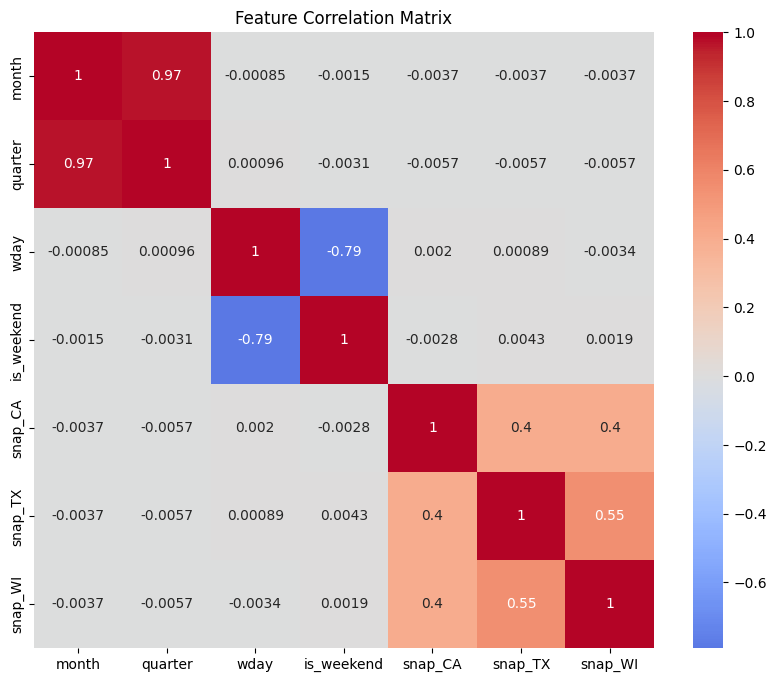

In [17]:
# Create additional time-based features for analysis
df_enhanced = df.copy()
df_enhanced['date'] = pd.to_datetime(df_enhanced['date'])
df_enhanced['quarter'] = df_enhanced['date'].dt.quarter
df_enhanced['day_of_year'] = df_enhanced['date'].dt.dayofyear
df_enhanced['week_of_year'] = df_enhanced['date'].dt.isocalendar().week
df_enhanced['is_weekend'] = df_enhanced['wday'].isin([1, 2]).astype(int)
df_enhanced['is_month_end'] = df_enhanced['date'].dt.is_month_end.astype(int)
df_enhanced['is_month_start'] = df_enhanced['date'].dt.is_month_start.astype(int)

# Analyze new features
feature_correlations = df_enhanced[['month', 'quarter', 'wday', 'is_weekend', 
                                   'snap_CA', 'snap_TX', 'snap_WI']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(feature_correlations, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

### Summary

In [18]:
# Summary insights for stakeholders
insights = {
    "Time Period": f"Dataset covers {(df['date'].max() - df['date'].min()).days} days",
    "Seasonality": "Strong weekly and monthly patterns observed",
    "Events": f"{len(df[df['event_name_1'].notna()])} special events identified",
    "SNAP Impact": "Significant variation in SNAP benefits across states",
    "Data Quality": "Complete time series with no missing dates",
    "Forecasting Considerations": [
        "Account for weekly seasonality (weekend vs weekday patterns)",
        "Include holiday/event effects in models",
        "Consider state-specific SNAP benefit impacts",
        "Monthly seasonality patterns vary by state"
    ]
}

print("=== EDA SUMMARY FOR STAKEHOLDERS ===")
for key, value in insights.items():
    if isinstance(value, list):
        print(f"\n{key}:")
        for item in value:
            print(f"  • {item}")
    else:
        print(f"{key}: {value}")

=== EDA SUMMARY FOR STAKEHOLDERS ===
Time Period: Dataset covers 1968 days
Seasonality: Strong weekly and monthly patterns observed
Events: 162 special events identified
SNAP Impact: Significant variation in SNAP benefits across states
Data Quality: Complete time series with no missing dates

Forecasting Considerations:
  • Account for weekly seasonality (weekend vs weekday patterns)
  • Include holiday/event effects in models
  • Consider state-specific SNAP benefit impacts
  • Monthly seasonality patterns vary by state
